### High-concentration water on shelf

Look at HCW calculated as transport of water with tracer concentration higher or equal that threshold across shelf and canyon lid. The threshold is the tracer concentration at shelf break depth.


In [1]:
#%load_ext autoreload
#%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import scipy.stats 
import seaborn as sns

import canyon_tools.metrics_tools as mtt 
import canyon_tools.readout_tools as rout

In [2]:
# Set appearance options seaborn

sns.set_style('white')
sns.set_context('notebook')


In [3]:
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

CanyonGridNoC='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/gridGlob.nc'
CanyonGridOutNoC = Dataset(CanyonGridNoC)

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

# Grid variables
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc = CanyonGridOut.variables['RC']
dxg = rout.getField(CanyonGrid, 'dxG') # x coords tracer cells
dyg = rout.getField(CanyonGrid, 'dyG') # y coords tracer cells

bathy = rout.getField(CanyonGrid, 'Depth')
hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

bathyNoC = rout.getField(CanyonGridNoC, 'Depth')
hFacCNoC = rout.getField(CanyonGridNoC, 'HFacC')
MaskCNoC = rout.getMask(CanyonGridNoC, 'HFacC')

rA = rout.getField(CanyonGrid, 'rA')

z = CanyonStateOut.variables['Z']
drF = CanyonGridOut.variables['drF']
time = CanyonStateOut.variables['T']

In [4]:
# Create an empty class to save information of every run

class run:
    pass

In [5]:
#Define all runs, create empty run records
CNTDIFF_kv7 = run()  
CNTDIFF_base = run()
CNTDIFF_kv4 = run()
CNTDIFF_kv3= run()
CNTDIFF_N63 = run()
CNTDIFF_N39 = run()
CNTDIFF_N30 = run()
CNTDIFF_N74 = run()
CNTDIFF_N45 = run()
CNTDIFF_f100 = run()
CNTDIFF_f76 = run()
CNTDIFF_f48 = run()
CNTDIFF_f86 = run()
CNTDIFF_f64 = run()
DIFF3D_run04 = run()
DIFF3D_run05 = run()
DIFF3D_run06 = run()
DIFF3D_run07 = run()
LESS_BF_u32 = run()
LESS_BF_u26 = run()

records = [CNTDIFF_kv7,
           CNTDIFF_base, 
           CNTDIFF_kv4, 
           CNTDIFF_kv3,
           CNTDIFF_N63, 
           CNTDIFF_N39,
           CNTDIFF_N30,
           CNTDIFF_N74,
           CNTDIFF_N45,
           CNTDIFF_f100,
           CNTDIFF_f76,
           CNTDIFF_f48,
           CNTDIFF_f86,
           CNTDIFF_f64,
           DIFF3D_run04,
           DIFF3D_run05,
           DIFF3D_run06,
           DIFF3D_run07,
           LOWER_BF_u32,
           LOW_BF_u26]

In [36]:
expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           'CNTDIFF_run45',
           'CNTDIFF_run44',
           'CNTDIFF_run46',
           'CNTDIFF_run73',
           'CNTDIFF_run75',
           'CNTDIFF_run67',
           'CNTDIFF_run51',
           'CNTDIFF_run52',
           'CNTDIFF_run69',
           'CNTDIFF_run71',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07',
           'LOWER_BF_run01',
           'LOW_BF_run01']

expCodes = ['CNTDIFF',
           'CNTDIFF',
           'CNTDIFF',
           'CNTDIFF',
           'CNTDIFF',
           'CNTDIFF',
           'CNTDIFF',
           'CNTDIFF',
           'CNTDIFF',
           'CNTDIFF',
           'CNTDIFF',
           'CNTDIFF',
           'CNTDIFF',
           'CNTDIFF',
           '3DDIFF',
           '3DDIFF',
           '3DDIFF',
           '3DDIFF',
           'LOWER_BF',
           'LOW_BF']

runNums  = ['run61',
           'run38',
           'run62',
           'run63',
           'run45',
           'run44',
           'run46',
           'run73',
           'run75',
           'run67',
           'run51',
           'run52',
           'run69',
           'run71',
           'run04',
           'run05',
           'run06',
           'run07',
           'run01',
           'run01']


markersizes = [15,13,11,9,13,13,11,11,9,13,13,11,11,9,14,14,11,11,11,11]
markerstyles = ['o','o','o','o','d',"d","d",'d','d','p','p','p','p','p','^','^','^','^','*','*']

exp_labels = ['$\kappa$=10$^{-7}$',
              '$N_0$=5.5x10$^{-3}$,$\kappa$=10$^{-5}$,f=9.66x10$^{-5}$,U=0.34 m/s',
              '$\kappa$=10$^{-4}$',
              '$\kappa$=10$^{-3}$',
              '$N_0$=6.3x10$^{-3}$',
              '$N_0$=3.9x10$^{-3}$',
              '$N_0$=3.0x10$^{-3}$',
              '$N_0$=7.4x10$^{-3}$',
              '$N_0$=4.5x10$^{-3}$',
              'f=1.0x$10^{-4}$',
              'f=7.68x10$^{-5}$',
              'f=4.84x10$^{-5}$',
              'f=8.6x10$^{-5}$',
              'f=6.4x10$^{-5}$',
              '$\kappa$=10$^{-3}$,$\kappa_o$=10$^{-7}$',
              '$\kappa$=10$^{-4}$,$\kappa_o$=10$^{-7}$',
              '$\kappa$=10$^{-3}$,$\kappa_o$=10$^{-5}$',
              '$\kappa$=10$^{-4}$,$\kappa_o$=10$^{-5}$',
              'U=0.32 m/s',
              'U=0.26 m/s',
             ]

colours = ["pine",
           "emerald",#
          "tealish",
          "teal blue",# 
           "slate grey",
           "black",
           "grey",
           'light grey',
           'steel',
           "navy blue",
           "blue",
           "cerulean",
           "light blue",
           'sky blue',
          "deep rose",
          "cherry red",
          "brown",
          "gold",
           "red",
          "dark red"]# 


Nos = np.array([5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                6.3E-3,3.9E-3,3.0E-3,7.4E-3,4.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                5.5E-3,5.5E-3])

fs = np.array([9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               1.0E-4,7.68E-5,4.84E-5,8.6E-5,6.4E-5,
               9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               9.66E-5,9.66E-5])

Us = np.array([0.37,0.37,0.37,0.37,
               0.37,0.37,0.37,0.37,0.37,
               0.37,0.37,0.37,0.37,0.37,
               0.37,0.37,0.37,0.37,
               0.34,0.26])

Kvs = np.array([1E-7,1E-5,1E-4,1E-3,
                1E-5,1E-5,1E-5,1E-5,1E-5,
                1E-5,1E-5,1E-5,1E-5,1E-5,
                1E-3,1E-4,1E-3,1E-4,
                1E-5,1E-5])

# Fill the fields of the records
for record,expName,expCode,runNum,No,fo,uo,kvo,col,explabel,marksize,markstyle in zip(records,expNames,
                                                                                      expCodes,runNums,
                                                                                      Nos,fs,Us,Kvs,
                                                                                      colours,exp_labels,
                                                                                      markersizes,markerstyles):
    record.name = expName
    record.exp_code = expCode
    record.run_num = runNum
    record.label = explabel
    record.color = col
    record.msize = marksize
    record.mstyle = markstyle
    record.N = No
    record.f = fo
    record.u = uo
    record.kv = kvo


In [30]:
# Constants and scales

L = 6400.0 # canyon length
R = 5000.0 # Upstream radius of curvature
g = 9.81 # accel. gravity
Wsb = 13000 # Width at shelf break
Hs = 150.0 # Shelf break depth

# NOTE: The default values of all functions correspond to the base case

def Dh(f=9.66E-4,L=6400.0,N=5.5E-3):
    '''Vertical scale Dh'''
    return(f*L/(N))
    
def Z(U=0.36,L=6400.0,N=5.5E-3,R=5000.0):
    '''Depth of upwelling as scaled in Allen and Hickey 2010'''
    return((1.4*U*(L**(1/2)))/(Nos*(R**(1/2))))

def Ro(U=0.36,f=9.66E-4,R=5000.0):
    '''Rossby number using radius of curvature as length scale'''
    return(U/(f*R))

def F(Ro):
    '''Function that estimates the hability of the flow to follow isobaths'''
    return(Ro/(0.9+Ro))

def Rw(U=0.36,f=9.66E-5,Wsb=13000.0): 
    '''Rossby number using width at shelf break as length scale'''
    return(U/(f*Wsb))

def Bu(N=5.5E-3,f=9.66E-5,L=6400.0,Hs=150.0):
    '''Burger number'''
    return(N*Hs/(f*L))

def RossbyRad(N=5.5E-3,Hs=150.0,f=9.66E-4):
    '''1st Rossby radius of deformation'''
    return(N*Hs/f)

def Phi(U=0.34,f=9.66E-5,L=6400,R=5000.0,Wsb=13000,N=0.0055):
    ''' flux of upwelling as in Allen and Hickey 2010 , with expected coef of 1/4'''
    #f2 = (0.9**(1.5))*((Ro(U,f,R))/(1+(Ro(U,f,R)/0.9)))**(1.5)
    #f3 = Ro(U,f,L)**(0.5)
    f2=1.2*((U**3)*Wsb*L**(0.5))/(N*f*R**(3/2))
    return(f2)

In [8]:
# Save HCW at each 1/2 day into class record.

for record in records:
    
    filename=('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s/ptracersGlob.nc' %(record.exp_code,record.run_num))
    Tr = rout.getField(filename,'Tr1') 
    
    record.HCW = mtt.calc_HCW(Tr, MaskC, rA, hFacC, drF[:], nzlim=29, yin=227, zfin=29, xi=180, yi=50)
    

tracer limit concentration is:  7.21757
tracer limit concentration is:  7.21757
tracer limit concentration is:  7.21757
tracer limit concentration is:  7.21757
tracer limit concentration is:  7.21757
tracer limit concentration is:  7.21757
tracer limit concentration is:  7.21757
tracer limit concentration is:  7.21757
tracer limit concentration is:  7.21757
tracer limit concentration is:  7.21757
tracer limit concentration is:  7.21757
tracer limit concentration is:  7.21757
tracer limit concentration is:  7.21757
tracer limit concentration is:  7.21757
tracer limit concentration is:  7.21757
tracer limit concentration is:  7.21757
tracer limit concentration is:  7.21757
tracer limit concentration is:  7.21757


OSError: No such file or directory

In [9]:
# get shelf volume
ShVol = mtt.calc_ShelfVolume(rA, hFacC, drF[:], yin=227, zfin=29)
print(ShVol)

255061338236.0


### HCW on shelf

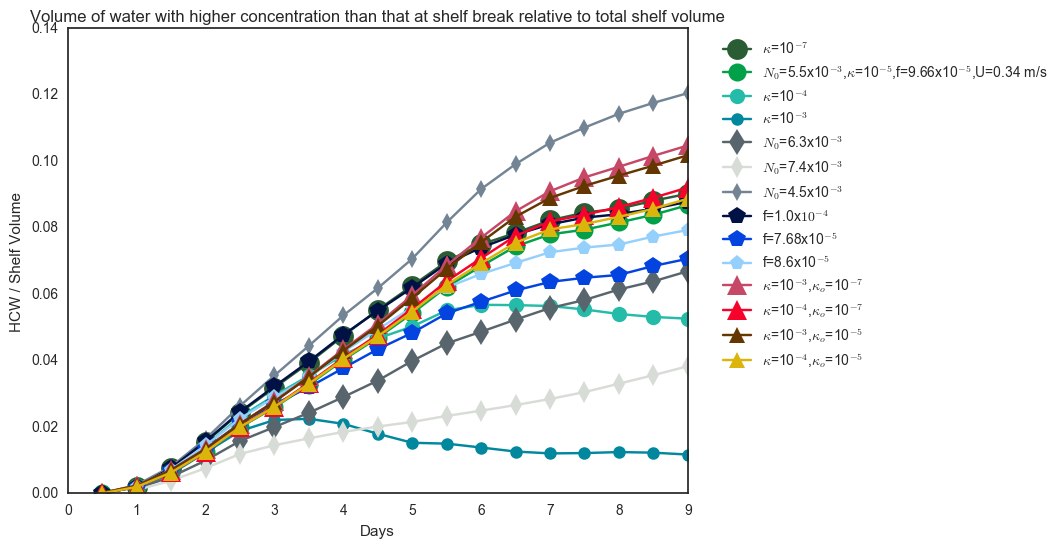

In [37]:
# Choose only the runs that satisfy all restrictions in Allen and Hickey (2010)
records_AH2010 = [CNTDIFF_kv7,
                  CNTDIFF_base, 
                  CNTDIFF_kv4, 
                  CNTDIFF_kv3,
                  CNTDIFF_N63, 
                  CNTDIFF_N74,
                  CNTDIFF_N45,
                  CNTDIFF_f100,
                  CNTDIFF_f76,
                  CNTDIFF_f86,
                  DIFF3D_run04,
                  DIFF3D_run05,
                  DIFF3D_run06,
                  DIFF3D_run07,
                  #LESS_BF_u31,
                  #LESS_BF_u20
                 ]

fig,ax = plt.subplots(1,1,figsize=(8,6))
labels=[]

for rec in records_AH2010:
    
    plt1 = ax.plot(time[:]/(3600*24),rec.HCW/ShVol,
                   marker = rec.mstyle,
                   markersize = rec.msize,
                   color = sns.xkcd_rgb[rec.color],
                   label=rec.label)
   
    ax.set_title('Volume of water with higher concentration than that at shelf break relative to total shelf volume')
    ax.set_ylabel('HCW / Shelf Volume')
    ax.set_xlabel('Days')

    ax.legend(bbox_to_anchor=(1.6,1))

plt.show()



### Upwelling flux comparison to AH2010 

To calculate the upwelling flux from the HCW measurement we will subtract the volume of HCW a little bit after the beginning of the advective phase (day 5) from that at the end of the simulation (day 9) and divide by the time between them:

$\Phi = \frac{V_{HCW}(t_2)-V_{HCW}(t_1)}{t_2-t_1}$.

The scaling from AH2010 estimated the upwelling flux as:

$\Phi_{AH} = UW_{sb}Dh(\frac{0.9R_o}{1+R_o/0.9})^{3/2}R_L^{1/2} $

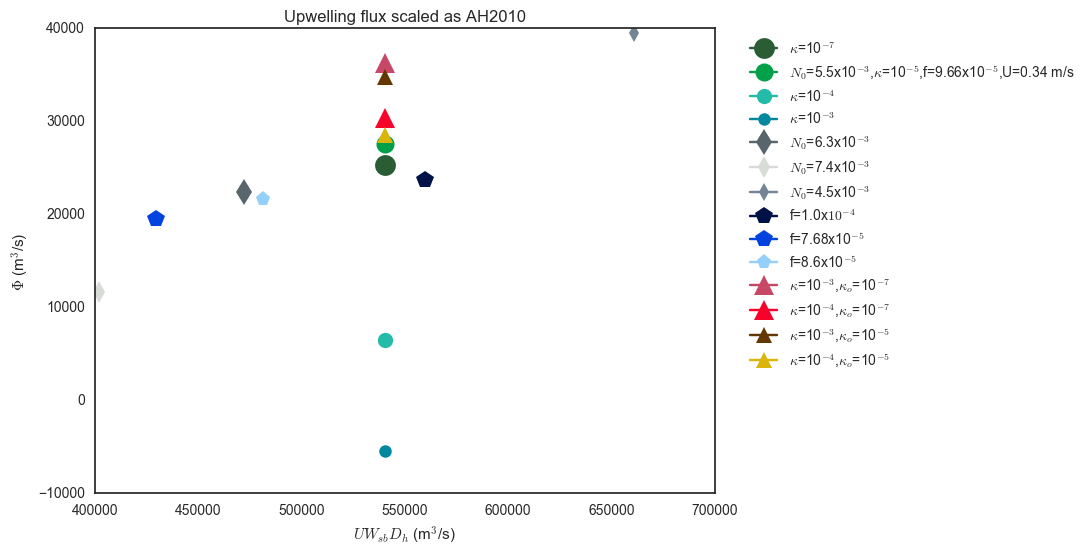

In [38]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
labels=[]

for rec in records_AH2010:
    plt1 = ax.plot(rec.u*Wsb*Dh(rec.f,L,rec.N),
                   ((rec.HCW[18]-rec.HCW[8])/(time[18]-time[8])),
                   marker = rec.mstyle,
                   markersize = rec.msize,
                   color = sns.xkcd_rgb[rec.color],
                   label=rec.label)
   
    ax.set_title('Upwelling flux scaled as AH2010')
    ax.set_ylabel('$\Phi$ (m$^3$/s)')
    ax.set_xlabel('$UW_{sb}D_h$ (m$^3$/s)')

    ax.legend(bbox_to_anchor=(1.6,1))

plt.show()

